This notebook is used to analyze our dataset of people that we will ask biographies for.

In [20]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tikzplotlib
from ast import literal_eval
import config

In [3]:
languages=config.languages
data_dir='../data/'
results_dir='../result/'
fig_dir='../report/Images/'

## DATA IMPORTATION

In [4]:
#Page titles
with open(data_dir+'human_terms.json', 'r', encoding='utf-8') as f:
    all_page_titles=json.load(f)

In [5]:
#Page views
with open(data_dir+'page_views.json', 'r', encoding='utf-8') as f:
    page_views_count=json.load(f)

In [6]:
pers_df=pd.read_csv(data_dir+'raw_people_analysis.csv')

In [7]:
wiki_df=pd.read_csv(data_dir+"knowledge_source.csv")

In [8]:
page_views_df=pd.read_csv(data_dir+'pageviews.csv')

In [9]:
#Wiki factscores
with open(results_dir+"scores/all_wiki_scores.json", 'r', encoding='utf-8') as f:
    wiki_fs=json.load(f)

## VIEW COUNTS

In [9]:
#Total number of views per language
page_views_df.iloc[:, 2:21].sum(axis=0)

en    1.509578e+09
ru    1.744199e+08
ja    8.253512e+07
zh    6.150731e+07
es    2.834648e+08
fr    1.528613e+08
vi    1.819495e+07
tr    4.860820e+07
fa    5.608578e+07
ko    1.698128e+07
ar    6.005385e+07
hu    1.490497e+07
th    1.029752e+07
hi    1.884301e+07
bn    6.853471e+06
ms    2.380101e+06
ta    2.714696e+06
sw    9.431460e+05
jv    6.510510e+05
dtype: float64

In [10]:
page_norm=page_views_df.copy()
page_norm.iloc[:, 2:21]= page_norm.iloc[:, 2:21].div(page_norm.iloc[:, 2:21].sum(axis=0), axis=1) * 100
page_norm['total_views']=page_norm.iloc[:,2:21].sum(axis=1)

Text(0.5, 0, '')

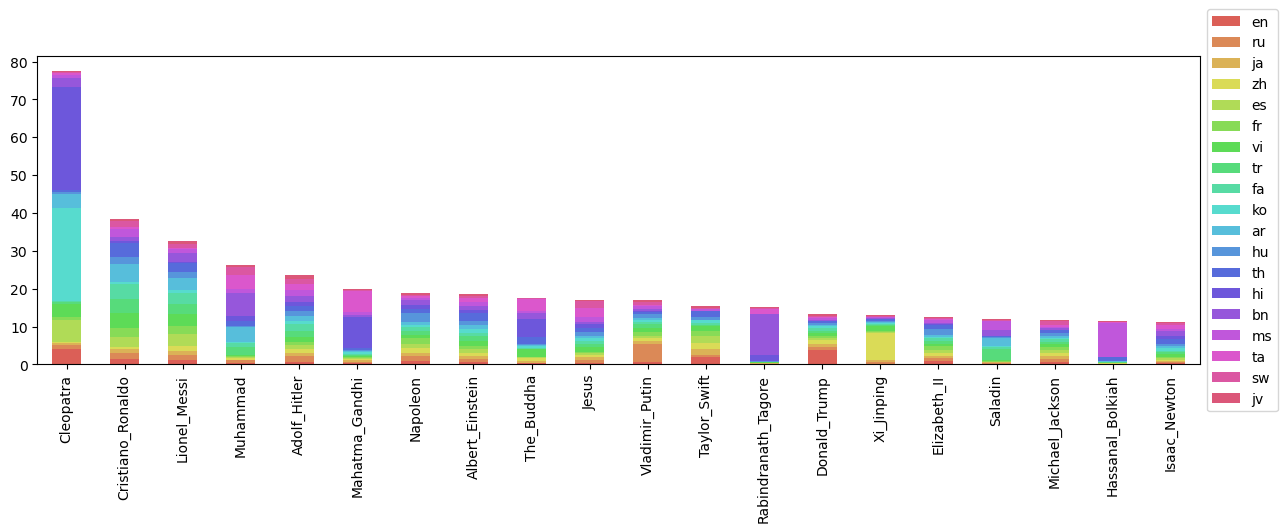

In [11]:
fig,ax=plt.subplots(figsize=(15,4))
page_norm.sort_values('total_views', ascending=False).iloc[:20, :]\
    .set_index('name').drop(['link_wiki', 'total_views'], axis=1)\
        .plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette("hls", 19))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel('')

In [19]:
lang='sw'
page_norm.sort_values(lang, ascending=False).loc[:, ['name',lang]].iloc[:20, :]

,name,sw
210,Muhammad,2.166579
0,Jesus,1.700373
234,Cristiano_Ronaldo,1.527759
4,Adolf_Hitler,1.334682
214,Martin_Luther,1.268945
80,Michael_Jackson,1.264279
302,Saint_Peter,1.202889
14,Lionel_Messi,1.071414
450,Idi_Amin,1.066113
145,Vasco_da_Gama,0.942060


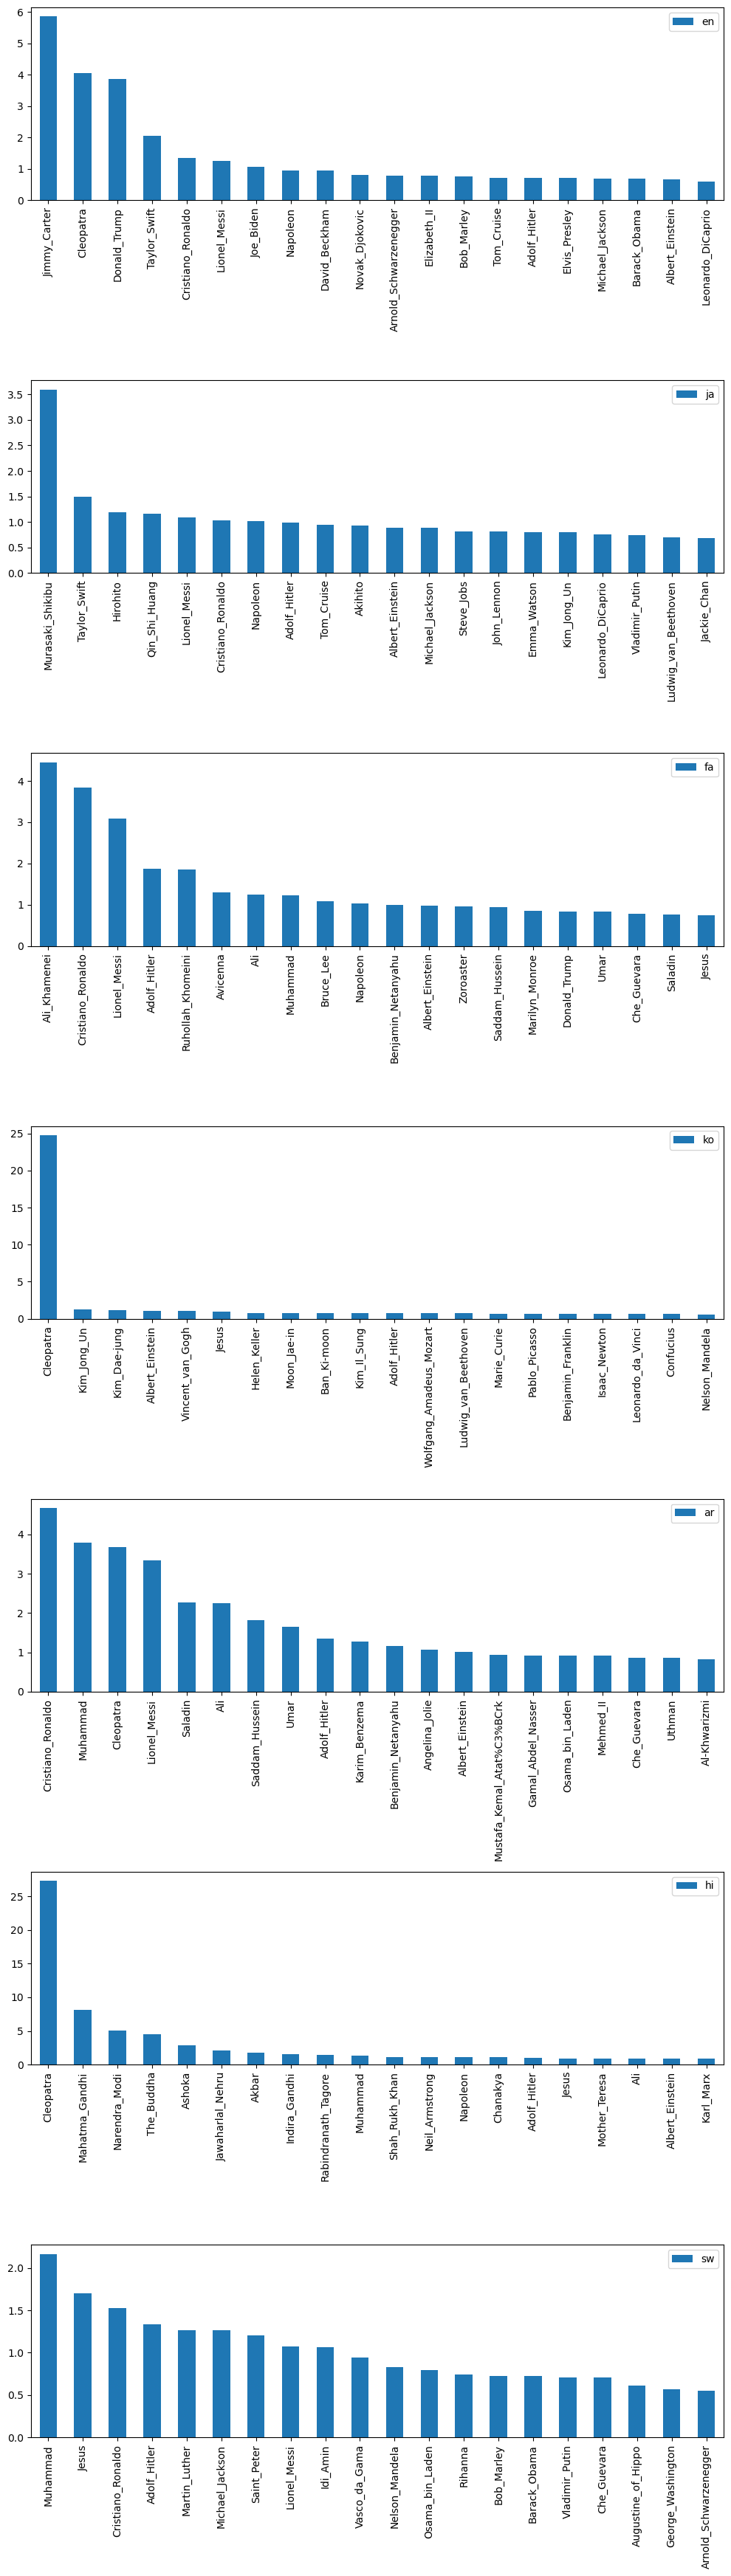

In [20]:
langs=['en', 'ja', 'fa', 'ko', 'ar', 'hi', 'sw']
fig,ax=plt.subplots(figsize=(10,5*len(langs)), nrows=len(langs))
for i, lang in enumerate(langs):
    page_norm[['name',lang]].sort_values(lang, ascending=False).iloc[:20, :]\
        .set_index('name')\
            .plot(kind='bar', ax=ax[i])
    ax[i].set_xlabel('')
plt.tight_layout()

## PEOPLE DATASET EXPLORATION

In [12]:
pers_df

,code,name,instance,citizenship,language,birth_place,birth_date,death_date,gender,occupation
0,Q302,Jesus,human biblical figure,Herodian Kingdom of Judea,"['Galilean dialect', 'Biblical Hebrew', 'Koine...",Bethlehem,NaN,NaN,male,preacher
1,Q303,Elvis_Presley,human,United States of America,['English'],Tupelo,1935-01-08,1977-08-16,male,film actor
2,Q307,Galileo_Galilei,human,Duchy of Florence,"['Latin', 'Italian']",Pisa,NaN,1642-01-08,male,astronomer
3,Q329,Nicolas_Sarkozy,human,France,['French'],Paris,1955-01-28,NaN,male,politician
4,Q352,Adolf_Hitler,human,Cisleithania,"['Austrian German', 'German']",Braunau am Inn,1889-04-20,1945-04-30,male,politician
...,...,...,...,...,...,...,...,...,...,...
483,Q83338,Robin_Williams,human,United States of America,['English'],Chicago,1951-07-21,2014-08-11,male,stand-up comedian
484,Q83488,Mesut_%C3%96zil,human,Germany,"['German', 'Turkish']",Gelsenkirchen,1988-10-15,NaN,male,association football player
485,Q83492,Gary_Oldman,human,United Kingdom,['English'],London,1958-03-21,NaN,male,film actor
486,Q84405,Karl_Landsteiner,human,Austria-Hungary,['German'],Vienna,1868-06-14,1944-06-26,male,physiologist


In [19]:
pers_df[pers_df.birth_date.isna()&pers_df.death_date.isna()]

,code,name,instance,citizenship,language,birth_place,birth_date,death_date,gender,occupation
0,Q302,Jesus,human biblical figure,Judea,"['Galilean dialect', 'Biblical Hebrew', 'Koine...",Bethlehem,NaN,NaN,male,religious person
15,Q619,Nicolaus_Copernicus,human,Poland,"['Renaissance Latin', 'Middle Polish', 'Middle...",Toruń,NaN,NaN,male,astronomer
16,Q635,Cleopatra,human,Egypt,"['Koine Greek', 'Egyptian', 'Aramaic languages...",Alexandria,NaN,NaN,female,ruler
20,Q692,William_Shakespeare,human,United Kingdom,"['Early Modern English', 'British English', 'E...",Stratford-upon-Avon,NaN,NaN,male,scriptwriter
21,Q720,Genghis_Khan,human,Mongolia,[],Delüün Boldog,NaN,NaN,male,military
...,...,...,...,...,...,...,...,...,...,...
384,Q39978,Nostradamus,human,France,['French'],Saint-Rémy-de-Provence,NaN,NaN,male,healthcare provider
394,Q40930,Nefertiti,human,Egypt,[],Thebes,NaN,NaN,female,ruler
430,Q44269,Saint_Nicholas,human,Italy,['Ancient Greek'],Patara,NaN,NaN,male,religious person
444,Q46830,Robert_Hooke,human,United Kingdom,"['English', 'Latin', 'Ancient Greek']",Freshwater,NaN,NaN,male,artist


In [18]:
pers_df.isna().sum()

code             0
name             0
instance         0
citizenship      0
language         0
birth_place      1
birth_date      95
death_date     222
gender           0
occupation       0
dtype: int64

### Birth year

In [14]:
def get_year(x):
    if not pd.isnull(x):
        splitted=x.split("-")
        if len(splitted)==3:
            year, month, day=splitted
            return int(year)
        elif len(splitted)==1:
            return int(splitted[0])

In [15]:
pers_df['birth_year']=pers_df.birth_date.apply(get_year)
pers_df['death_year']=pers_df.death_date.apply(get_year)

Text(0.5, 0, 'Birth year')

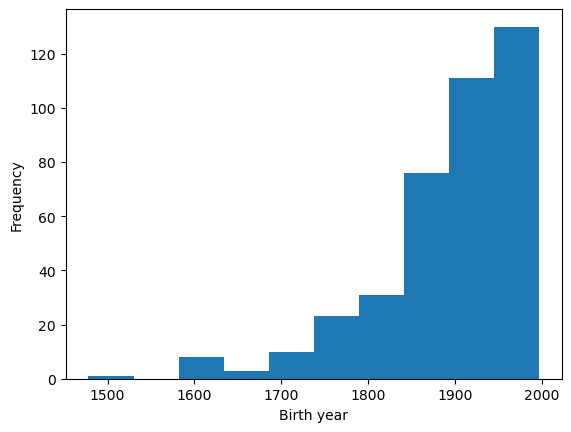

In [16]:
pers_df.birth_year.plot(kind='hist')
plt.xlabel('Birth year')

Text(0.5, 0, 'Death year')

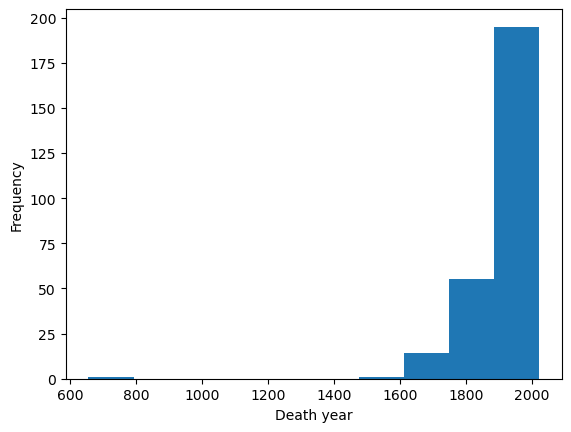

In [17]:
pers_df.death_year.plot(kind='hist')
plt.xlabel('Death year')

In [18]:
pers_df['is_dead']=pers_df.death_date.notna()

In [19]:
pers_df.is_dead.value_counts()

True     266
False    222
Name: is_dead, dtype: int64

### Gender

In [20]:
pers_df.gender.value_counts(normalize=True)

male           0.850410
female         0.145492
genderfluid    0.002049
non-binary     0.002049
Name: gender, dtype: float64

### Citizenship

In [14]:
pers_df.citizenship=pers_df.citizenship.astype(str)
pers_df.loc[pers_df.citizenship.str.startswith("Kingdom"), 'citizenship']=pers_df.loc[pers_df.citizenship.str.startswith("Kingdom"), 'citizenship'].str.replace("Kingdom of ", '')
pers_df.loc[pers_df.citizenship.str.startswith("People's"), 'citizenship']=pers_df.loc[pers_df.citizenship.str.startswith("People's"), 'citizenship'].str.replace("People's ", '')
pers_df.loc[pers_df.citizenship.str.startswith("Duchy"), 'citizenship']=pers_df.loc[pers_df.citizenship.str.startswith("Duchy"), 'citizenship'].str.replace("Duchy of ", '')
pers_df.loc[pers_df.citizenship.str.startswith("Electorate"), 'citizenship']=pers_df.loc[pers_df.citizenship.str.startswith("Electorate"), 'citizenship'].str.replace("Electorate of ", '')
pers_df.loc[pers_df.citizenship.str.startswith("Republic"), 'citizenship']=pers_df.loc[pers_df.citizenship.str.startswith("Republic"), 'citizenship'].str.replace("Republic of ", '')

In [15]:
modif_citizens={'British America':'United States', 'United States of America':'United States',
    'Great Britain':'United Kingdom', 'England':'United Kingdom', 'United Kingdom of Great Britain and Ireland': 'United Kingdom', 
    "Irish Free State": "Ireland",
    'Francia':'France', 'French First Republic': 'France',
    'Sultanate of Egypt':'Egypt', 'Khedivate of Egypt':'Egypt', 'New Kingdom of Egypt':'Egypt', "Ancient Egypt":"Egypt", "Ptolemaic Kingdom":"Egypt",
    'German Empire': 'Germany', 'German Reich': "Germany", "Holy Roman Empire": "Germany", "Prussia": "Germany", "Archbishopric of Salzburg":"Germany", "Cologne":"Germany", 
    "Saxony":"Germany", "Saxe-Eisenach": "Germany", "Saxe-Weimar-Eisenach":"Germany", 'Weimar Republic': "Germany", "Confederation of the Rhine":"Germany", 
    "Nazi Germany": "Germany", "Hanover":"Germany", 'Württemberg': 'Germany', 'Hesse': "Germany", "Bavaria": "Germany", 'Baden':"Germany",
    'Austrian Empire': 'Austria', "Cisleithania": "Austria",
    "Florence": "Italy", "Genoa": "Italy", "Venice": "Italy", "Ancient Rome": "Italy", "ancient Syracuse": "Italy", 
    "Italian Social Republic":"Italy", "Milan":"Italy",
    "Socialist Federal Republic of Yugoslavia":"Yugoslavia",
    "Old Swiss Confederacy":"Switzerland", 'Geneva':"Switzerland", 
    "Gold Coast Colony":"Ghana",
    "Classical Athens":"Greece", "Samos": "Greece",
    "Lu":"Luxemburg",
    "SHAKYA":"India", "Maurya empire": "India", 'British Raj': "India",
    "Pahlavi Iran": "Iran", "Samanid Empire": "Iran", "Achaemenid Empire": "Iran",
    "Russian Empire": "Russia", "Tsardom of Russia":"Russia", "Russian Socialist Federative Soviet Republic":"Russia",
    "Dutch Republic": 'Netherlands', 'the Netherlands': 'Netherlands',
    "Herodian Kingdom of Judea": "Judea",
    "Qi": "China", "Qin dynasty":"China","Qing Dynasty":"China", "Tang dynasty": "China", "Zhou dynasty": "China", "Western Han": "China", 'British Hong Kong': "China", 
    "Mongol Empire": "Mongolia",
    "Hejaz": "Saudi Arabia",
    "Crown of Castile":"Spain",
    "Free City of Danzig":"Poland",
    'Halicarnassus': "Turkey",
    'Ancient Carthage':'Tunisia',
    'French Indochina': "Vietnam", 'North Vietnam': "Vietnam"
    }
pers_df.loc[pers_df.citizenship.isin(modif_citizens.keys()), 'citizenship']=pers_df.loc[pers_df.citizenship.isin(modif_citizens.keys()), 'citizenship'].map(modif_citizens)

In [16]:
pers_df.loc[pers_df.code.isin(['Q868', 'Q5264', 'Q36303']), 'citizenship']='Greece'
pers_df.loc[pers_df.code.isin(['Q9438']), 'citizenship']='Italy'
pers_df.loc[pers_df.code.isin(['Q35811', 'Q9546']), 'citizenship']='Iran'
pers_df.loc[pers_df.code.isin(['Q8581']), 'citizenship']='Iraq'
pers_df.loc[pers_df.code.isin(['Q81731']), 'citizenship']='Japan'
pers_df.loc[pers_df.code.isin(['Q33923']), 'citizenship']='Judea'
pers_df.loc[pers_df.code.isin(['Q7331']), 'citizenship']='Morocco'
pers_df.loc[pers_df.code.isin(['Q8597']), 'citizenship']='Pakistan'
pers_df.loc[pers_df.code.isin(['Q9458', 'Q8467', 'Q39619']), 'citizenship']='Saudi Arabia'
pers_df.loc[pers_df.code.isin(['Q34503']), 'citizenship']='Turkey'
pers_df.loc[pers_df.code.isin(['Q9294']), 'citizenship']='Tunisia'
pers_df.loc[pers_df.code.isin(['Q9038']), 'citizenship']='Uzbekistan'

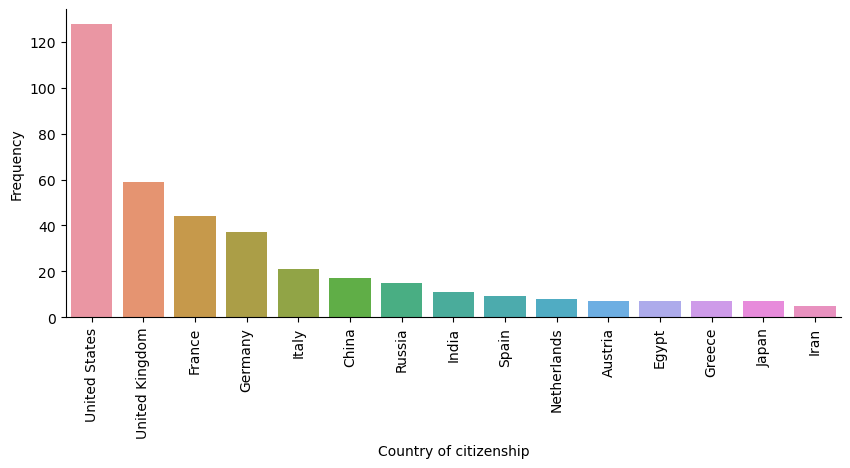

In [50]:
fig,ax=plt.subplots(figsize=(10,4))
data=pers_df.citizenship.value_counts().nlargest(15)
sns.barplot(x=data.index, y=data.values, order=data.index)
sns.despine(bottom = False, left = False)
plt.xticks(rotation=90)
plt.xlabel('Country of citizenship')
plt.ylabel('Frequency')
tikzplotlib.save("test.tex")
plt.show()

In [51]:
pers_df.to_csv(data_dir+'clean_people_analysis.csv', index=False)

In [26]:
# Count the number of people per country
country_counts =pers_df.citizenship.value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Create the map visualization
fig = px.choropleth(country_counts, 
                    locations='Country', 
                    locationmode='country names', 
                    color='Count', 
                    hover_name='Country',
                    #title="People by Country of Citizenship",
                    color_continuous_scale=px.colors.sequential.Magenta)

fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=20),)

fig.show()
fig.write_image(fig_dir+"people_by_country_of_citizenship.png")

### Spoken languages

In [27]:
pers_df.language=pers_df.language.apply(literal_eval)

In [28]:
lang_df=pers_df.explode('language', ignore_index=True)

In [29]:
lang_df.language=lang_df.language.astype(str)
lang_df.loc[lang_df.language.str.startswith("Middle"), 'language']=lang_df.loc[lang_df.language.str.startswith("Middle"), 'language'].str.replace("Middle ", '')
lang_df.loc[lang_df.language.str.startswith("Old"), 'language']=lang_df.loc[lang_df.language.str.startswith("Old"), 'language'].str.replace("Old ", '')
lang_df.loc[lang_df.language.str.startswith("New"), 'language']=lang_df.loc[lang_df.language.str.startswith("New"), 'language'].str.replace("New ", '')
lang_df.loc[lang_df.language.str.startswith("Low"), 'language']=lang_df.loc[lang_df.language.str.startswith("Low"), 'language'].str.replace("Low ", '')
lang_df.loc[lang_df.language.str.startswith("High"), 'language']=lang_df.loc[lang_df.language.str.startswith("High"), 'language'].str.replace("High ", '')
lang_df.loc[lang_df.language.str.startswith("Classical"), 'language']=lang_df.loc[lang_df.language.str.startswith("Classical"), 'language'].str.replace("Classical ", '')
lang_df.loc[lang_df.language.str.startswith("Medieval"), 'language']=lang_df.loc[lang_df.language.str.startswith("Medieval"), 'language'].str.replace("Medieval ", '')

In [56]:
import re

In [57]:
lang_df['language'] = lang_df['language'].apply(lambda x: 'Chinese' if re.search('chinese', x.lower()) else x)

In [58]:
modif_lang={'American English':'English', 'British English':'English', 'Canadian English': 'English', 'Early Modern English': 'English', 
    "Mandarin": "Chinese",
    "Ottoman Turkish":"Turkish",
    'Renaissance Latin':'Latin', 
    "Austrian German": "German", 
    "Argentine Spanish":"Spanish", "Mexican Spanish": "Spanish",
    "Koine Greek": "Ancient Greek",
    "Venetian": "Italian",
    "Biblical Hebrew":"Hebrew",
    }
lang_df.loc[lang_df.language.isin(modif_lang.keys()), 'language']=lang_df.loc[lang_df.language.isin(modif_lang.keys()), 'language'].map(modif_lang)

In [60]:
lang_df=lang_df[lang_df.language!='nan']

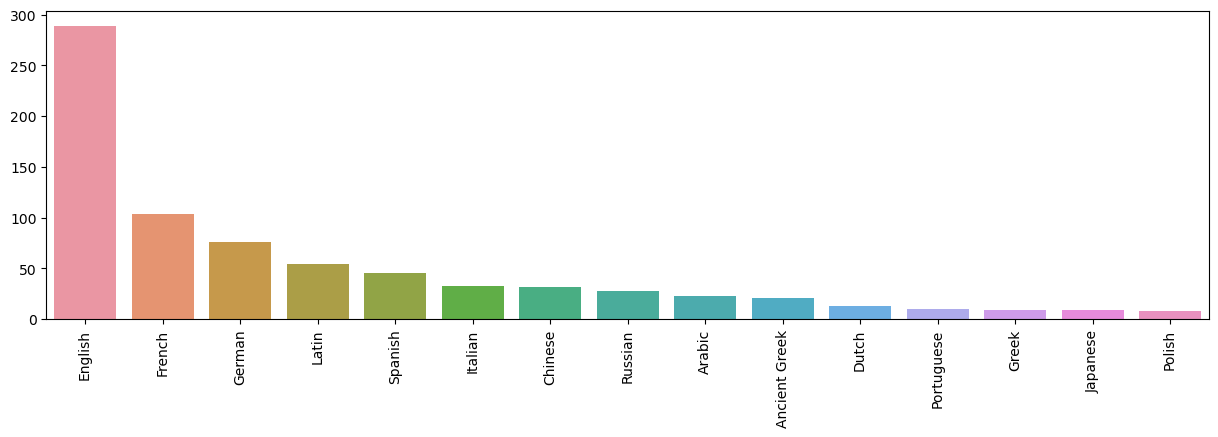

In [63]:
fig,ax=plt.subplots(figsize=(15,4))
data=lang_df.language.value_counts().nlargest(15)
sns.barplot(x=data.index, y=data.values, order=data.index)
plt.xticks(rotation=90)
tikzplotlib.save("test.tex")
plt.show()

### Occupation

In [48]:
len(pers_df.occupation.unique())

50

In [17]:
pers_df[pers_df.occupation=='explorer']

,code,name,instance,citizenship,language,birth_place,birth_date,death_date,gender,occupation
39,Q926,Roald_Amundsen,human,Norway,['Norwegian'],Borge Municipality,1872-07-16,1928-06-18,male,explorer
67,Q1496,Ferdinand_Magellan,human,Portugal,"['Italian', 'Portuguese', 'Spanish']",Ponte da Barca,NaN,NaN,male,explorer
139,Q7322,Christopher_Columbus,human,Italy,"['Spanish', 'Italian']",Genoa,NaN,NaN,male,explorer
140,Q7321,Jacques_Cartier,human,France,['French'],Saint-Malo,NaN,NaN,male,explorer
141,Q7326,Hern%C3%A1n_Cort%C3%A9s,human,Spain,['Spanish'],Medellín,NaN,NaN,male,explorer
143,Q7324,James_Cook,human,United Kingdom,"['English', 'French']",Marton,1728-10-27,1779-02-14,male,explorer
144,Q7331,Ibn_Battuta,human,Morocco,"['Arabic', 'Persian', 'Turkish']",Tangier,NaN,NaN,male,explorer
145,Q7328,Vasco_da_Gama,human,Portugal,['Portuguese'],Sines,NaN,NaN,male,explorer
300,Q33817,Edmund_Hillary,human,New Zealand,['English'],Auckland,1919-07-20,2008-01-11,male,explorer
301,Q33866,Theodore_Roosevelt,human,United States,"['English', 'French', 'German', 'Italian']",Manhattan,1858-10-27,1919-01-06,male,explorer


In [12]:
pers_df.occupation.value_counts()

politician               111
writer                    45
actor                     41
sportsperson              29
physicist                 29
philosopher               21
singer                    19
artist                    19
mathematician             18
ruler                     15
explorer                  12
film director              8
songwriter                 8
religious person           8
business professional      7
military                   7
chemist                    7
scriptwriter               6
biologist                  6
astronomer                 6
legal professional         5
journalist                 4
engineer                   4
linguist                   4
producer                   4
anthropologist             3
geologist                  3
economist                  3
healthcare provider        3
programmer                 3
scientist                  3
translator                 2
inventor                   2
diplomat                   2
television pre

In [10]:
modif_occupation={'preacher':'religious person', 'Islamic jurist':'religious person', 'Latin Catholic priest':'religious person', 'religious sister':'religious person', 'presbyter':'religious person', 'prophet':'religious person', 'bhikkhu':'religious person',
                  'United States Naval Aviator':"military", 'naval officer':'military', 'military leader':'military', 'military officer':'military', 'military personnel':'military',
                   'philosopher of language':'philosopher', 'political philosopher':'philosopher', 'political scientist':'philosopher',
                  'film actor':'actor', 'television actor':'actor', 'stage actor':'actor', 'comedian':'actor', 
                  'stand-up comedian':'comedian', 'singer-songwriter':'singer', 'vocalist':'singer', 'rapper':'singer',
                  'cosmologist':'astronomer',
                  'Formula One driver':'sportsperson', 'association football coach':'sportsperson', 'association football player':'sportsperson', 'basketball player':'sportsperson', 'boxer':'sportsperson', 
                  'dancer':'sportsperson', 'tennis player':'sportsperson', 'professional wrestler':'sportsperson',
                  'sculptor':'artist', 'painter':'artist', 'musician':'artist', 'architect':'artist', 
                  'civil engineer':'engineer',
                  'Ancient Roman politician':'politician', 'civil rights advocate':'politician', 'revolutionary':'politician', 'Internet activist':'politician', 'trade unionist':'politician', 
                  'orator':'politician', 'statesperson':'politician',
                  'computer scientist':'scientist', 'bacteriologist':'biologist', 'microbiologist':'biologist', 'biochemist':'chemist', 
                  'king':'ruler', 'queen':'ruler', 'queen regnant':'ruler', 'sovereign':'ruler', 'monarch':'ruler', 'tribal chief':'ruler',
                  'nuclear physicist':'physicist', 'theoretical physicist':'physicist',
                  'essayist':'writer', 'poet':'writer', 'diarist':'writer', 'novelist':'writer', 'blogger':'writer', 
                  'playwright':"scriptwriter", 'screenwriter': "scriptwriter",
                  'composer':'songwriter', 'lyricist':'songwriter',
                  'war correspondent':'journalist',
                  'nurse':'healthcare provider', 'physician':'healthcare provider', 'pharmacist':'healthcare provider',
                  'judge':'legal professional', 'lawyer': 'legal professional', 'jurist':'legal professional',
                  'conquistador':'explorer', 'navigator':'explorer',
                  'film producer':'producer', 'record producer': 'producer',
                  'entrepreneur':'business professional', 'business magnate':'business professional', 'investor':'business professional'

    }
pers_df.loc[pers_df.occupation.isin(modif_occupation.keys()), 'occupation']=pers_df.loc[pers_df.occupation.isin(modif_occupation.keys()), 'occupation'].map(modif_occupation)

In [11]:
sorted(pers_df.occupation.unique())

['actor',
 'aircraft pilot',
 'anthropologist',
 'artist',
 'astronaut',
 'astronomer',
 'biologist',
 'business professional',
 'chemist',
 'comedian',
 'curator',
 'diplomat',
 'economist',
 'engineer',
 'explorer',
 'film director',
 'geologist',
 'healthcare provider',
 'herder',
 'historian',
 'inventor',
 'jihadist',
 'journalist',
 'lady-in-waiting',
 'legal professional',
 'linguist',
 'mathematician',
 'merchant',
 'military',
 'model',
 'naturalist',
 'philosopher',
 'physicist',
 'physiologist',
 'politician',
 'producer',
 'programmer',
 'psychoanalyst',
 'religious person',
 'ruler',
 'scientist',
 'scriptwriter',
 'singer',
 'songwriter',
 'sportsperson',
 'teacher',
 'television presenter',
 'theatre manager',
 'theologian',
 'translator',
 'writer']

In [24]:
def categorize_job(job):
    if 'physicist' in job:
        return 'physicist'
    elif 'engineer' in job:
        return 'engineer'
    elif 'scientist' in job:
        return 'scientist'
    elif 'politician' in job:
        return 'politician'
    else:
        return job

# Create a DataFrame
pers_df.occupation=pers_df.occupation.apply(categorize_job)


## WIKI SUMMARIES STATISTICS

In [45]:
wiki_df=wiki_df[wiki_df.link_wiki.isin(all_page_titles.keys())]

In [46]:
wiki_df[['lang', 'length']].groupby('lang').describe()

length                                                           \
      count           mean           std     min       25%       50%   
lang                                                                   
ar    486.0   63581.458848  77358.689578  1535.0  17536.75   31977.0   
bn    486.0   42015.915638  68916.522159  1125.0  10310.50   18512.0   
en    486.0  144989.446502  83773.390078  7595.0  83434.25  132158.5   
es    486.0   83927.051440  78624.740136  4273.0  32190.25   59516.5   
fa    486.0   48157.664609  63938.511333  2200.0  14829.25   26136.0   
fr    486.0  103228.627572  94187.239249  4385.0  39448.50   74533.0   
hi    486.0   31302.419753  52617.080519   370.0   3883.50    9238.5   
hu    486.0   37769.230453  50326.679898  1638.0  10643.25   21219.5   
ja    486.0   67581.862140  70055.409016  2064.0  24318.50   46224.5   
jv    486.0    5151.788066   6786.667900   194.0   2600.00    3858.0   
ko    486.0   36027.925926  45924.226330  1140.0   9113.50   19990.0   
ms    486.0   17482.829218  27959.134883   575.0   4547.75    8793.0   
pl    486.0   40571.380658  49451.371430  1520.0  12504.50   24382.5   
sw    486.0    7213.720165  22866.322990   250.0   1049.25    2136.5   
ta    486.0   31967.022634  51853.779874  1158.0   6918.25   17653.5   
th    486.0   37469.654321  60457.439245  1323.0   9151.50   16694.5   
tr    486.0   37481.820988  53114.711003   573.0   9966.50   18775.5   
vi    486.0   64100.061728  76455.779054  1698.0  13982.75   35737.0   
zh    486.0   54765.833333  56802.704841  3023.0  17474.50   32274.5   

                           
            75%       max  
lang                       
ar     80282.25  603280.0  
bn     43495.00  705928.0  
en    195455.00  483127.0  
es    112647.00  630080.0  
fa     50708.25  401361.0  
fr    136282.25  780596.0  
hi     26040.25  334777.0  
hu     39969.50  407203.0  
ja     80966.00  515315.0  
jv      5905.50  116364.0  
ko     41310.50  352160.0  
ms     16937.25  298405.0  
pl     49221.25  414248.0  
sw      4690.50  217100.0  
ta     30039.75  471229.0  
th     32187.00  512234.0  
tr     39665.00  372227.0  
vi     88541.75  624908.0  
zh     73933.50  404711.0

In [47]:
wiki_df[['lang', 'length_sum']].groupby('lang').describe()

length_sum                                                             \
          count         mean          std    min      25%     50%      75%   
lang                                                                         
ar        486.0  1634.557613  1135.072100  132.0   670.00  1403.0  2421.75   
bn        486.0  1313.345679  1114.346012   58.0   474.50   970.0  1859.50   
en        486.0  2472.960905  1017.311099  188.0  1729.00  2519.0  3139.75   
es        486.0  2246.565844  1565.925818  179.0  1085.00  1929.5  3091.25   
fa        486.0  1348.294239  1099.638761   89.0   440.00  1001.0  2020.00   
fr        486.0  1871.895062  1267.310287  117.0   889.25  1539.0  2625.50   
hi        486.0  1091.923868  1519.561303   19.0   313.25   698.0  1433.50   
hu        486.0  1163.582305  3773.442041   62.0   314.25   636.0  1303.00   
ja        486.0   343.390947   242.278240   49.0   177.00   267.0   419.50   
jv        486.0   921.567901   694.091882   54.0   414.00   716.0  1258.00   
ko        486.0   656.537037   527.107416   60.0   242.25   483.0   954.75   
ms        486.0  1159.152263   966.052385   83.0   456.25   841.0  1571.25   
pl        486.0   904.565844   957.136258  108.0   269.00   514.0  1165.75   
sw        486.0   622.390947   650.674761   75.0   240.00   389.5   748.50   
ta        486.0  1239.522634  1100.320663   92.0   556.00   955.5  1583.75   
th        486.0  1373.808642  1189.048076   88.0   460.50   956.0  1929.00   
tr        486.0  1465.769547  1239.046070   32.0   428.50  1142.0  2204.50   
vi        486.0  1854.932099  1321.432786  124.0   728.00  1641.0  2747.25   
zh        486.0   564.847737   381.793312   70.0   253.75   491.0   786.75   

               
          max  
lang           
ar     6225.0  
bn     6504.0  
en     5451.0  
es     9335.0  
fa     5365.0  
fr     6645.0  
hi    25854.0  
hu    80376.0  
ja     1428.0  
jv     4742.0  
ko     3189.0  
ms     5791.0  
pl     7410.0  
sw     4646.0  
ta    13804.0  
th     6831.0  
tr     8799.0  
vi     7028.0  
zh     3085.0

Text(0.5, 1.0, 'Wikipedia summary length distribution by language')

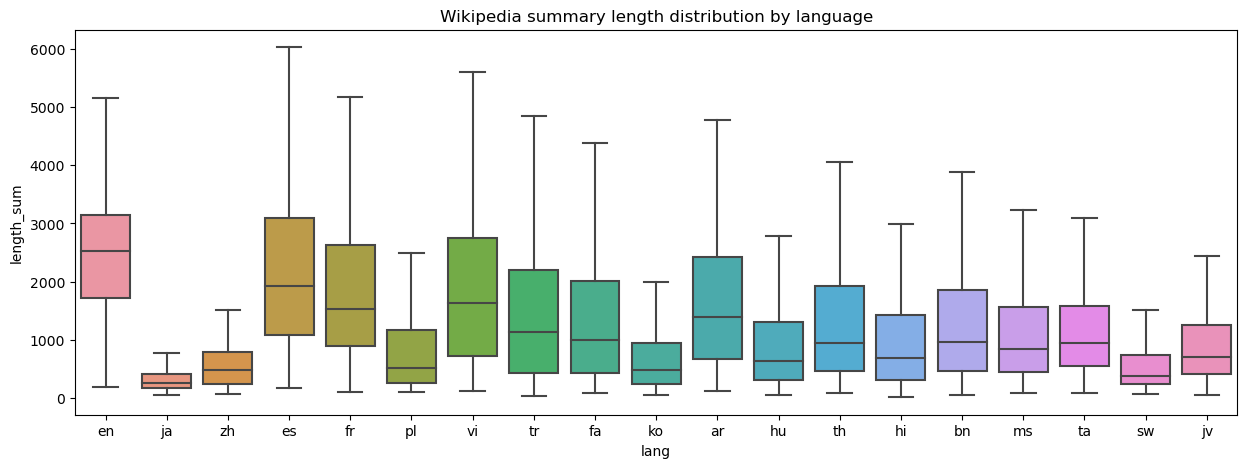

In [49]:
fig,ax=plt.subplots(figsize=(15,5))
sns.boxplot(data=wiki_df, x='lang', y='length_sum', showfliers=False, order=languages)
ax.set_title("Wikipedia summary length distribution by language")

Text(0, 0.5, '')

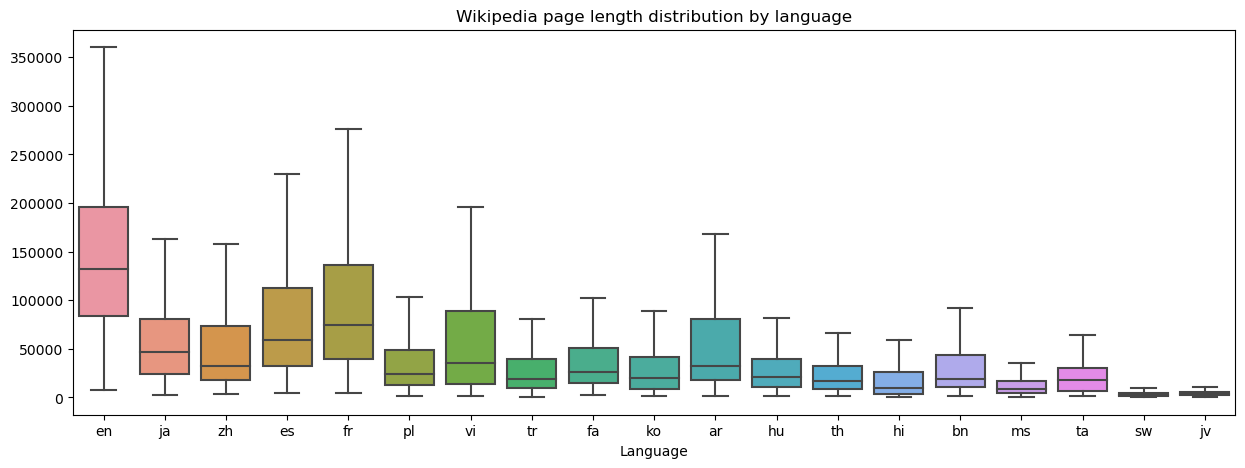

In [50]:
fig,ax=plt.subplots(figsize=(15,5))
sns.boxplot(data=wiki_df, x='lang', y='length', showfliers=False, order=languages)
ax.set_title("Wikipedia page length distribution by language")
ax.set_xlabel('Language')
ax.set_ylabel('')

Text(0.5, 1.0, 'Number of sentences in summary by language')

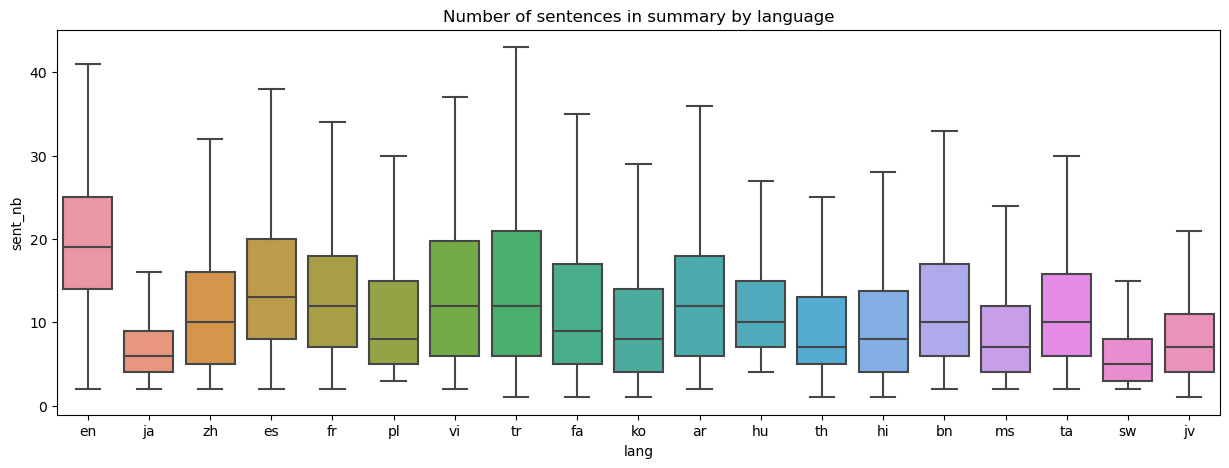

In [51]:
fig,ax=plt.subplots(figsize=(15,5))
sns.boxplot(data=wiki_df, x='lang', y='sent_nb', showfliers=False, order=languages)
ax.set_title("Number of sentences in summary by language")

# WIKI FACTSCORES

In [21]:
wiki_fs

{'http://www.wikidata.org/entity/Q1001': {'ja': [0.7209302325581395, 43.0],
  'zh': [0.7804878048780488, 41.0],
  'es': [0.6153846153846154, 117.0],
  'fr': [0.7798165137614679, 109.0],
  'pl': [0.6, 15.0],
  'vi': [0.7473684210526316, 95.0],
  'tr': [0.8811881188118812, 101.0],
  'fa': [0.9483870967741935, 155.0],
  'ko': [0.6538461538461539, 52.0],
  'ar': [0.8113207547169812, 106.0],
  'hu': [0.7586206896551724, 29.0],
  'th': [0.8970588235294118, 136.0],
  'hi': [0.8055555555555556, 108.0],
  'bn': [0.8932038834951457, 103.0],
  'ms': [0.8260869565217391, 23.0],
  'ta': [0.8636363636363636, 22.0],
  'sw': [0.8666666666666667, 15.0],
  'jv': [0.9, 30.0],
  'en': [0.968944099378882, 161.0]},
 'http://www.wikidata.org/entity/Q10132': {'ja': [0.7349397590361446, 83.0],
  'zh': [0.7243589743589743, 156.0],
  'es': [0.5648854961832062, 131.0],
  'fr': [0.7, 100.0],
  'pl': [0.6610169491525424, 118.0],
  'vi': [0.6541353383458647, 133.0],
  'tr': [0.5581395348837209, 43.0],
  'fa': [0.739

In [22]:
wiki_fs_df=pd.DataFrame(wiki_fs)

In [23]:
wiki_fs_df

,http://www.wikidata.org/entity/Q1001,http://www.wikidata.org/entity/Q10132,http://www.wikidata.org/entity/Q10261,http://www.wikidata.org/entity/Q1035,http://www.wikidata.org/entity/Q10390,http://www.wikidata.org/entity/Q1043,http://www.wikidata.org/entity/Q1047,http://www.wikidata.org/entity/Q1048,http://www.wikidata.org/entity/Q10520,http://www.wikidata.org/entity/Q10524,...,http://www.wikidata.org/entity/Q7199,http://www.wikidata.org/entity/Q7200,http://www.wikidata.org/entity/Q7207,http://www.wikidata.org/entity/Q7226,http://www.wikidata.org/entity/Q7231,http://www.wikidata.org/entity/Q7241,http://www.wikidata.org/entity/Q7243,http://www.wikidata.org/entity/Q7245,http://www.wikidata.org/entity/Q7251,http://www.wikidata.org/entity/Q7321
ja,"[0.7209302325581395, 43.0]","[0.7349397590361446, 83.0]","[0.7333333333333333, 15.0]","[0.85, 40.0]","[0.8, 20.0]","[0.9166666666666666, 12.0]","[0.58, 50.0]","[0.8, 60.0]","[0.775, 40.0]","[0.7586206896551724, 58.0]",...,"[0.8478260869565217, 46.0]","[1.0, 13.0]","[0.7575757575757576, 33.0]","[0.875, 16.0]","[0.75, 48.0]","[0.896551724137931, 29.0]","[0.9047619047619048, 42.0]","[0.6666666666666666, 27.0]","[0.9130434782608695, 23.0]","[0.8, 20.0]"
zh,"[0.7804878048780488, 41.0]","[0.7243589743589743, 156.0]","[0.6666666666666666, 24.0]","[0.7697368421052632, 152.0]","[0.62, 100.0]","[0.864406779661017, 118.0]","[0.7142857142857143, 63.0]","[0.6557377049180327, 61.0]","[0.77, 100.0]","[0.6976744186046512, 43.0]",...,"[0.7647058823529411, 85.0]","[0.6235294117647059, 85.0]","[0.8095238095238095, 42.0]","[0.7192982456140351, 114.0]","[0.6311475409836066, 122.0]","[0.8461538461538461, 26.0]","[0.94, 50.0]","[0.7083333333333334, 48.0]","[0.6351351351351351, 74.0]","[0.7142857142857143, 35.0]"
es,"[0.6153846153846154, 117.0]","[0.5648854961832062, 131.0]","[0.6666666666666666, 54.0]","[0.7076923076923077, 130.0]","[0.9328859060402684, 149.0]","[0.776, 125.0]","[0.8888888888888888, 18.0]","[0.41935483870967744, 248.0]","[0.8252427184466019, 103.0]","[0.5759493670886076, 158.0]",...,"[0.5497382198952879, 191.0]","[0.6666666666666666, 24.0]","[0.7910447761194029, 201.0]","[0.7325581395348837, 86.0]","[0.64, 75.0]","[0.8301886792452831, 53.0]","[0.9294117647058824, 85.0]","[0.8767123287671232, 73.0]","[0.74, 100.0]","[0.6666666666666666, 36.0]"
fr,"[0.7798165137614679, 109.0]","[0.7, 100.0]","[0.6565656565656566, 99.0]","[0.8383838383838383, 99.0]","[0.7777777777777778, 99.0]","[0.5319148936170213, 47.0]","[0.6410256410256411, 39.0]","[0.6632653061224489, 98.0]","[0.47540983606557374, 61.0]","[0.5847457627118644, 118.0]",...,"[0.6354166666666666, 96.0]","[0.8181818181818182, 11.0]","[0.6906474820143885, 139.0]","[0.7466666666666667, 75.0]","[0.6904761904761905, 42.0]","[0.8686868686868687, 99.0]","[0.8064516129032258, 124.0]","[0.6875, 16.0]","[0.65625, 64.0]","[0.7567567567567568, 37.0]"
pl,"[0.6, 15.0]","[0.6610169491525424, 118.0]","[0.5185185185185185, 27.0]","[0.803921568627451, 102.0]","[0.7333333333333333, 15.0]","[0.8888888888888888, 9.0]","[0.6, 75.0]","[0.5869565217391305, 46.0]","[0.575, 40.0]","[0.5, 30.0]",...,"[1.0, 7.0]","[0.6, 15.0]","[0.8235294117647058, 17.0]","[0.7123287671232876, 73.0]","[0.6764705882352942, 34.0]","[0.6666666666666666, 15.0]","[0.7317073170731707, 41.0]","[0.6896551724137931, 29.0]","[0.7878787878787878, 33.0]","[0.4342857142857143, 175.0]"
vi,"[0.7473684210526316, 95.0]","[0.6541353383458647, 133.0]","[0.8769230769230769, 65.0]","[0.9545454545454546, 110.0]","[0.8053097345132744, 113.0]","[0.7727272727272727, 44.0]","[0.6578947368421053, 38.0]","[0.8957055214723927, 163.0]","[0.5904761904761905, 105.0]","[0.7111111111111111, 90.0]",...,"[0.7083333333333334, 24.0]","[1.0, 16.0]","[0.6518518518518519, 135.0]","[0.8435374149659864, 147.0]","[0.9523809523809523, 84.0]","[0.967391304347826, 92.0]","[0.8787878787878788, 33.0]","[0.8666666666666667, 15.0]","[0.7735849056603774, 106.0]","[0.8888888888888888, 9.0]"
tr,"[0.8811881188118812, 101.0]","[0.55813953488372

In [26]:
def get_nth_element(series, n):
    return series.apply(lambda x: x[n] if isinstance(x, list) and len(x) > n else np.nan)

In [27]:
# Splitting the DataFrame into two separate DataFrames
factscores = pd.DataFrame({col: get_nth_element(wiki_fs_df[col], 0) for col in wiki_fs_df.columns}).T
nb_facts = pd.DataFrame({col: get_nth_element(wiki_fs_df[col], 1) for col in wiki_fs_df.columns}).T

In [28]:
factscores

,ja,zh,es,fr,pl,vi,tr,fa,ko,ar,hu,th,hi,bn,ms,ta,sw,jv,en
http://www.wikidata.org/entity/Q1001,0.720930,0.780488,0.615385,0.779817,0.600000,0.747368,0.881188,0.948387,0.653846,0.811321,0.758621,0.897059,0.805556,0.893204,0.826087,0.863636,0.866667,0.900000,0.968944
http://www.wikidata.org/entity/Q10132,0.734940,0.724359,0.564885,0.700000,0.661017,0.654135,0.558140,0.739130,0.785714,0.628049,0.605839,0.792593,0.793103,0.826347,0.661538,0.746667,0.392157,0.648649,0.939850
http://www.wikidata.org/entity/Q10261,0.733333,0.666667,0.666667,0.656566,0.518519,0.876923,0.800000,0.687500,0.728261,0.918699,0.851064,0.809524,0.621212,0.730769,0.761905,0.779661,0.500000,0.656250,0.909910
http://www.wikidata.org/entity/Q1035,0.850000,0.769737,0.707692,0.838384,0.803922,0.954545,0.963964,0.928571,0.746835,0.874286,0.769231,0.855856,0.833333,0.842105,0.954545,0.900000,0.906250,0.904762,0.972973
http://www.wikidata.org/entity/Q10390,0.800000,0.620000,0.932886,0.777778,0.733333,0.805310,0.680851,0.500000,0.769231,0.897059,0.800000,1.000000,0.900000,0.900000,1.000000,0.802326,0.875000,0.655172,0.976190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.wikidata.org/entity/Q7241,0.896552,0.846154,0.830189,0.868687,0.666667,0.967391,1.000000,0.717949,1.000000,0.766667,0.872549,0.918919,0.935484,0.787440,0.808219,0.910959,1.000000,0.783333,0.972477
http://www.wikidata.org/entity/Q7243,0.904762,0.940000,0.929412,0.806452,0.731707,0.878788,0.935897,0.866667,0.840000,0.969697,0.970588,1.000000,0.744186,0.666667,0.864407,0.987179,1.000000,0.805556,0.964286
http://www.wikidata.org/entity/Q7245,0.666667,0.708333,0.876712,0.687500,0.689655,0.866667,0.771930,0.933333,0.909091,0.931373,0.600000,0.807692,0.846154,0.859259,0.805556,0.863636,1.000000,0.688889,0.975610
http://www.wikidata.org/entity/Q7251,0.913043,0.635135,0.740000,0.656250,0.787879,0.773585,0.571429,0.604651,0.761194,0.912162,0.823529,0.625000,0.853211,0.800000,0.944444,0.816327,0.700000,0.676471,0.967742


In [29]:
factscores[factscores < 0.2].stack()

http://www.wikidata.org/entity/Q10993  jv    0.181818
http://www.wikidata.org/entity/Q11459  hi    0.000000
http://www.wikidata.org/entity/Q39607  ms    0.190476
dtype: float64

In [36]:
with open(results_dir+"generation/wiki_generations_translated.json", 'r') as f:
    gen_text=json.load(f)

In [49]:
factscores*100

,ja,zh,es,fr,pl,vi,tr,fa,ko,ar,hu,th,hi,bn,ms,ta,sw,jv,en
http://www.wikidata.org/entity/Q1001,72.093023,78.048780,61.538462,77.981651,60.000000,74.736842,88.118812,94.838710,65.384615,81.132075,75.862069,89.705882,80.555556,89.320388,82.608696,86.363636,86.666667,90.000000,96.894410
http://www.wikidata.org/entity/Q10132,73.493976,72.435897,56.488550,70.000000,66.101695,65.413534,55.813953,73.913043,78.571429,62.804878,60.583942,79.259259,79.310345,82.634731,66.153846,74.666667,39.215686,64.864865,93.984962
http://www.wikidata.org/entity/Q10261,73.333333,66.666667,66.666667,65.656566,51.851852,87.692308,80.000000,68.750000,72.826087,91.869919,85.106383,80.952381,62.121212,73.076923,76.190476,77.966102,50.000000,65.625000,90.990991
http://www.wikidata.org/entity/Q1035,85.000000,76.973684,70.769231,83.838384,80.392157,95.454545,96.396396,92.857143,74.683544,87.428571,76.923077,85.585586,83.333333,84.210526,95.454545,90.000000,90.625000,90.476190,97.297297
http://www.wikidata.org/entity/Q10390,80.000000,62.000000,93.288591,77.777778,73.333333,80.530973,68.085106,50.000000,76.923077,89.705882,80.000000,100.000000,90.000000,90.000000,100.000000,80.232558,87.500000,65.517241,97.619048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.wikidata.org/entity/Q7241,89.655172,84.615385,83.018868,86.868687,66.666667,96.739130,100.000000,71.794872,100.000000,76.666667,87.254902,91.891892,93.548387,78.743961,80.821918,91.095890,100.000000,78.333333,97.247706
http://www.wikidata.org/entity/Q7243,90.476190,94.000000,92.941176,80.645161,73.170732,87.878788,93.589744,86.666667,84.000000,96.969697,97.058824,100.000000,74.418605,66.666667,86.440678,98.717949,100.000000,80.555556,96.428571
http://www.wikidata.org/entity/Q7245,66.666667,70.833333,87.671233,68.750000,68.965517,86.666667,77.192982,93.333333,90.909091,93.137255,60.000000,80.769231,84.615385,85.925926,80.555556,86.363636,100.000000,68.888889,97.560976
http://www.wikidata.org/entity/Q7251,91.304348,63.513514,74.000000,65.625000,78.787879,77.358491,57.142857,60.465116,76.119403,91.216216,82.352941,62.500000,85.321101,80.000000,94.444444,81.632653,70.000000,67.647059,96.774194


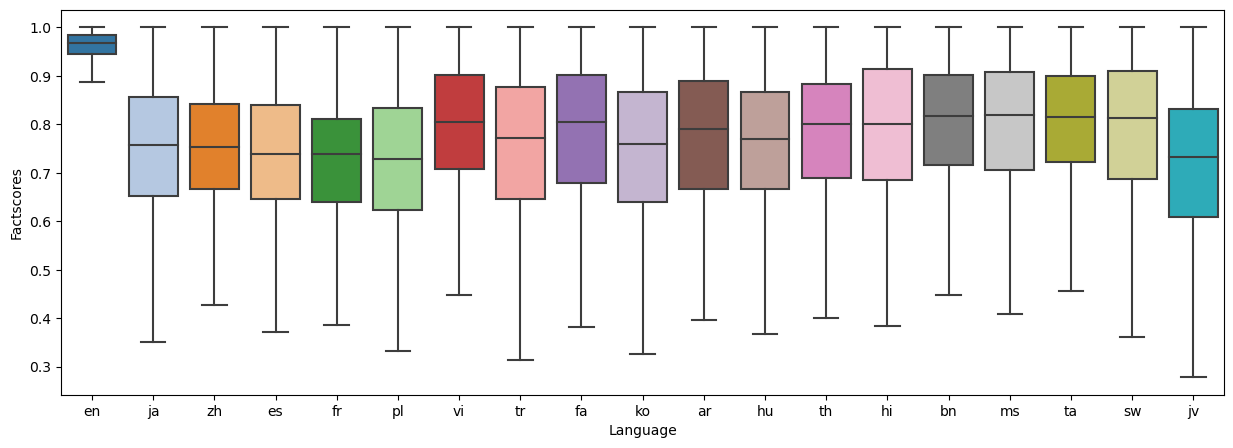

In [30]:
fs = (factscores).melt(var_name='Language', value_name='Factscores')
fig,ax=plt.subplots(figsize=(15,5))
sns.boxplot(data=fs, x='Language', y='Factscores', showfliers=False, order=languages, palette='tab20')
tikzplotlib.save(fig_dir+"wiki_factscores.tex")
#ax.set_title("Factscores for comparing to English Wikipedia")

<AxesSubplot:xlabel='Language', ylabel='Number of facts'>

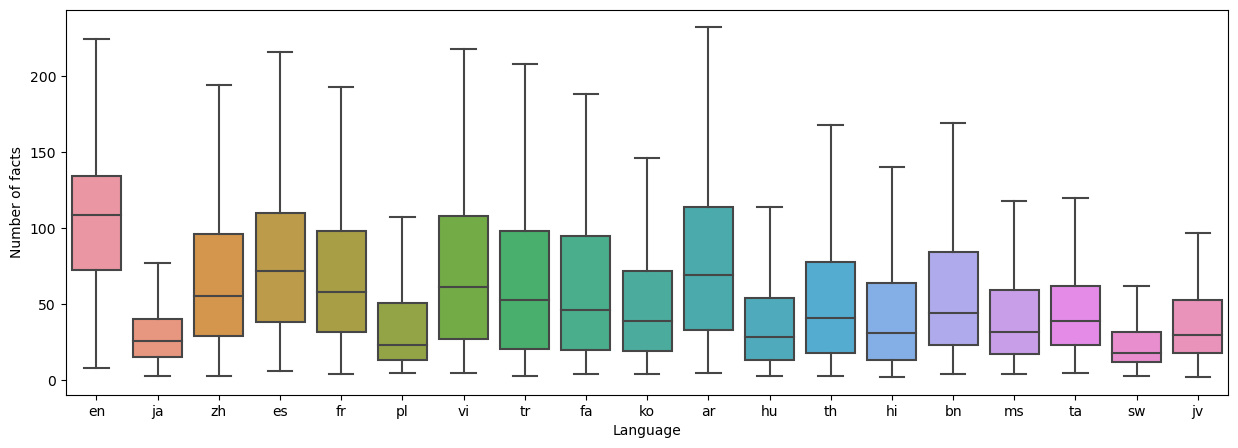

In [18]:
facts = nb_facts.melt(var_name='Language', value_name='Number of facts')
fig,ax=plt.subplots(figsize=(15,5))
sns.boxplot(data=facts, x='Language', y='Number of facts', showfliers=False, order=languages)
#ax.set_title("Number of facts in Wikipedia summaries")